In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
artworks = pd.read_csv("artworks.csv")
print(artworks.shape)
artworks.head()

(130262, 21)


,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Classification,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s)
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,Architecture,885.1996,NaN,NaN,48.6000,NaN,168.9000,NaN,NaN,NaN
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,Architecture,1.1995,NaN,NaN,40.6401,NaN,29.8451,NaN,NaN,NaN
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,1.1997,NaN,NaN,34.3000,NaN,31.8000,NaN,NaN,NaN
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995-01-17,Purchase and partial gift of the architect in ...,Y,...,Architecture,2.1995,NaN,NaN,50.8000,NaN,50.8000,NaN,NaN,NaN
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,2.1997,NaN,NaN,38.4000,NaN,19.1000,NaN,NaN,NaN


### Remove rows where *Date* or *Acquisition Date* is invalid

In [3]:
# drop rows where 'Date' is NaN
artworks = artworks.dropna(subset=['Date'])
artworks.shape

(127954, 21)

In [4]:
# for values in 'Date', if there is a year, choose the first occurance of the year, else, drop the row
import re
artworks['Date'] = artworks['Date'] \
    .map(lambda x: int(re.search('[1-2][0-9][0-9][0-9]', x).group(0)) if re.search('[1-2][0-9][0-9][0-9]', x) else None)
artworks = artworks.dropna(subset=['Date'])
artworks.shape

(126811, 21)

In [5]:
# drop rows where 'Acquisition Date' is NaN
artworks = artworks.dropna(subset=['Acquisition Date'])
artworks.shape

(121475, 21)

### Visualize distribution of *dates* & *acquisition dates*

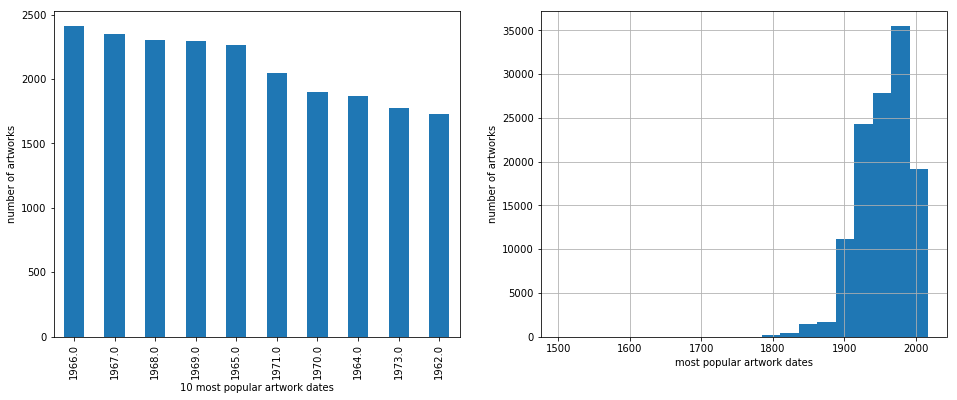

In [6]:
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
ax1.set_xlabel("10 most popular artwork dates")
ax1.set_ylabel("number of artworks")
artworks['Date'].value_counts().head(10).plot(kind='bar', ax=ax1)

ax2 = fig.add_subplot(122)
ax2.set_xlabel("most popular artwork dates")
ax2.set_ylabel("number of artworks")
artworks['Date'].hist(bins=20)

In [7]:
# just use the year of acquisition date and convert to int
artworks['Acquisition Date'] = artworks['Acquisition Date'].map(lambda x: int(str(x)[:4]))

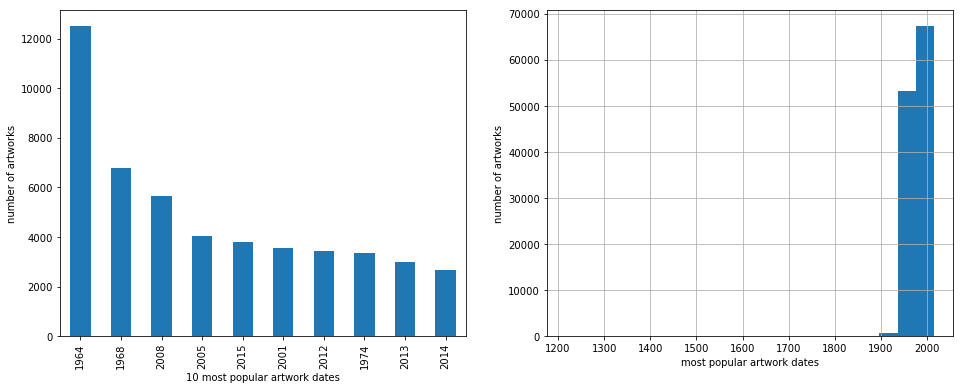

In [8]:
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
ax1.set_xlabel("10 most popular artwork dates")
ax1.set_ylabel("number of artworks")
artworks['Acquisition Date'].value_counts().head(10).plot(kind='bar', ax=ax1)

ax2 = fig.add_subplot(122)
ax2.set_xlabel("most popular artwork dates")
ax2.set_ylabel("number of artworks")
artworks['Acquisition Date'].hist(bins=20)

### Explore Classification of artworks

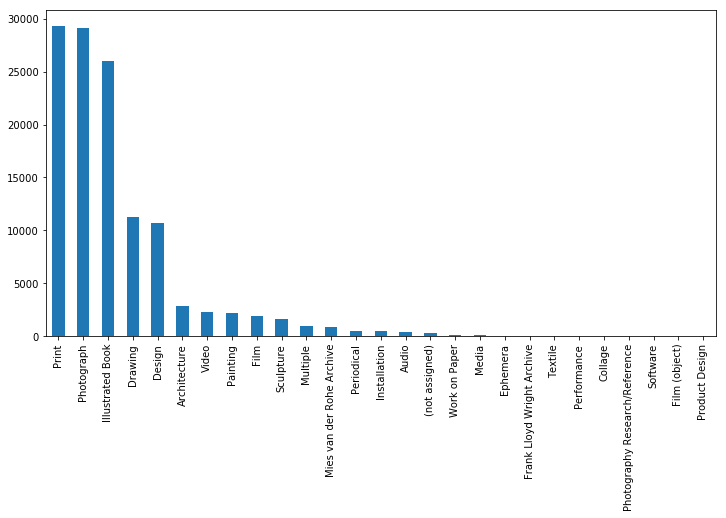

In [9]:
artworks['Classification'].value_counts().plot(kind='bar', figsize=(12,6))